In [163]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')

In [165]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Overall Satisfaction Points,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,54,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,53,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,55,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,53,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,49,Satisfied


In [166]:
df = df.drop(['ID'], axis = 1)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [168]:
# Checking if there're any null values
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [169]:
# Showing 'Arrival Delay' description because there is any missing value of it
df['Arrival Delay'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

In [170]:
# Filling all null values in the Arrival Delay column with 0
df['Arrival Delay'] = df['Arrival Delay'].fillna(0)

In [172]:
# Drop the rest of missing value
df = df.dropna()

In [173]:
# Checking if there're any null values
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Overall Satisfaction Points     

In [174]:
df.shape

(129880, 24)

In [175]:
df.describe().T # T for transpose

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129880.0,15.045465,38.416353,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
On-board Service,129880.0,3.383023,1.287099,0.0,2.0,4.0,4.0,5.0


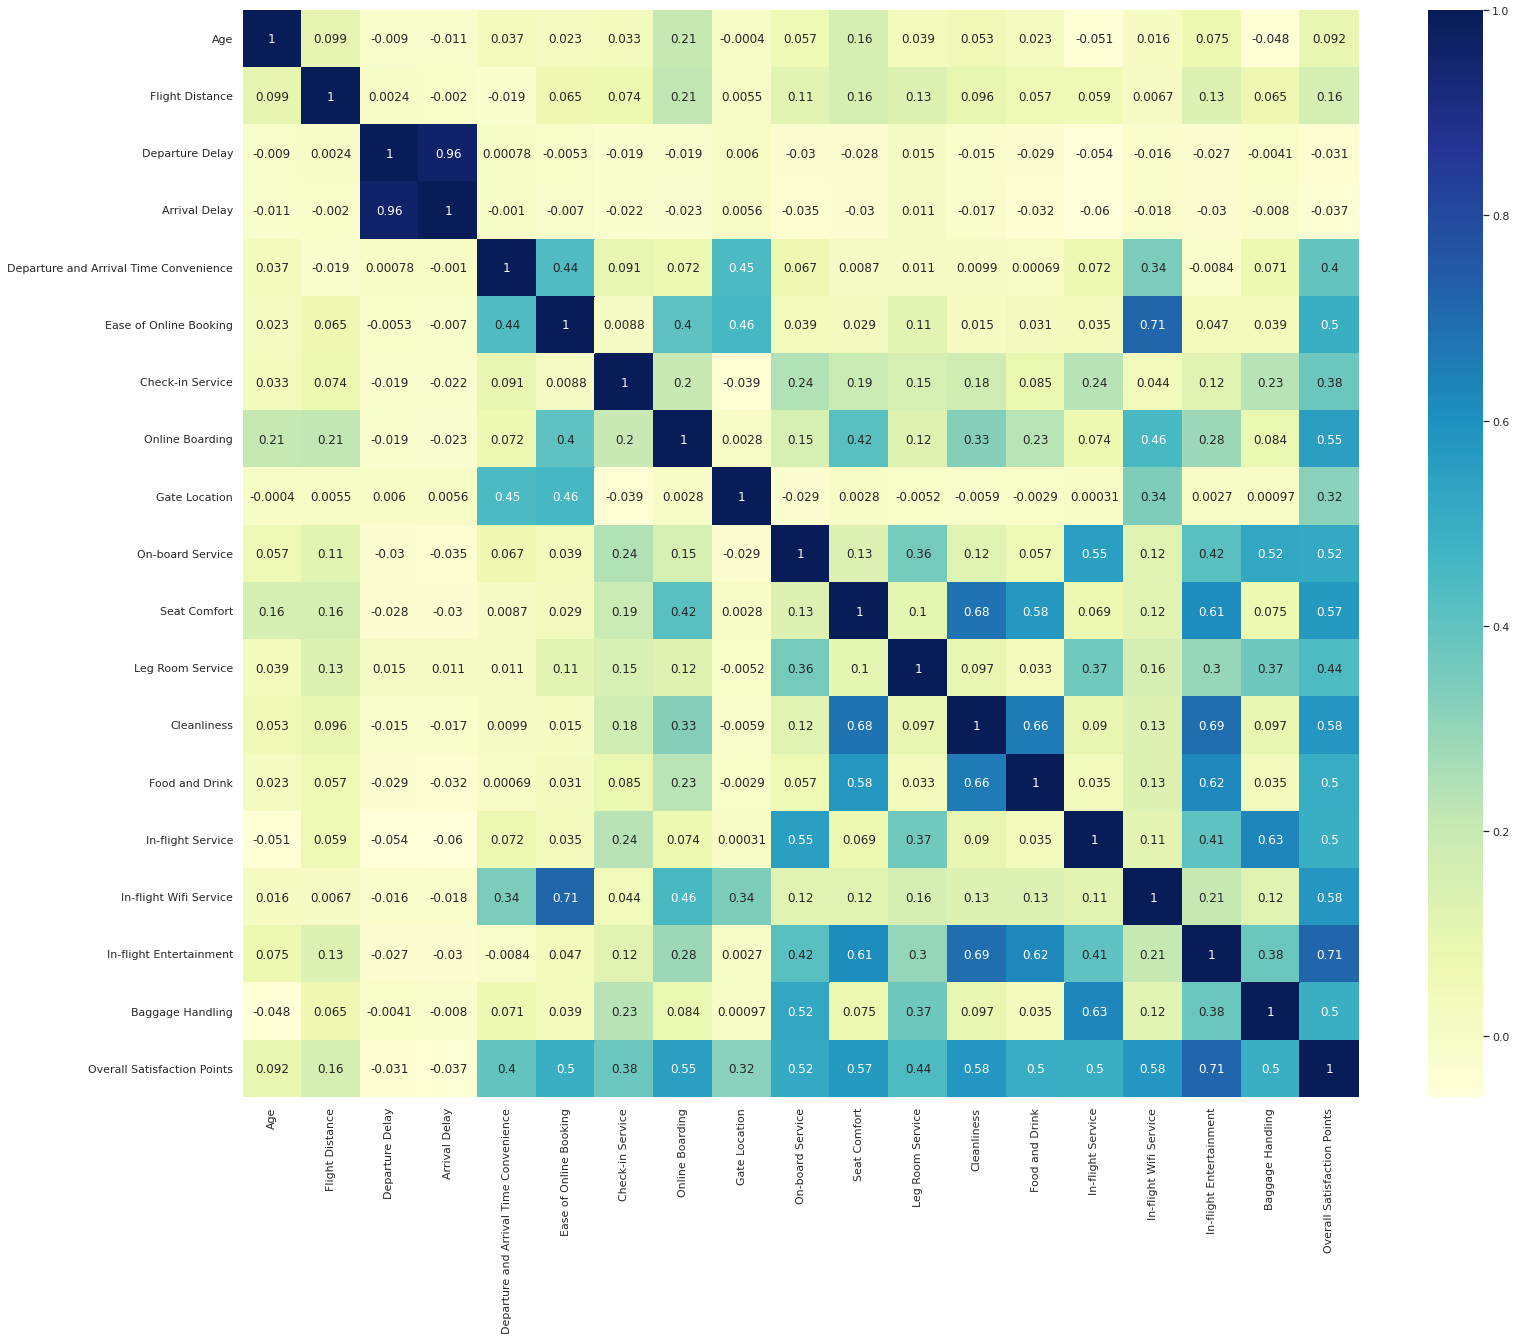

In [176]:
# Plotting a heatmap to show the correlation between features
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True , cmap = "YlGnBu");

In [177]:
# Checking if there're any duplicates
df.duplicated().sum()

0

In [178]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [179]:
Gender = df.Gender.value_counts()
Gender

Female    65899
Male      63981
Name: Gender, dtype: int64

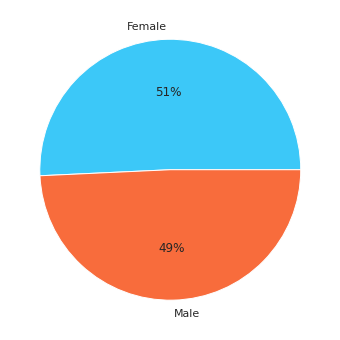

In [180]:
plt.pie(Gender, labels= ['Female', 'Male'], colors = ['#3CC8F8', '#F86C3C'], autopct='%.0f%%')
sns.set(font_scale=2)
plt.show()

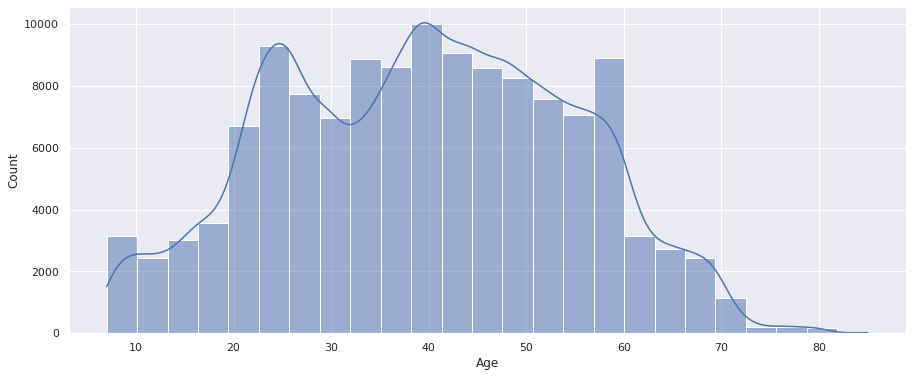

In [181]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.histplot(data=df, x='Age', bins=25, kde = True)

In [182]:
type_of_travel = df['Type of Travel'].value_counts()
type_of_travel

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

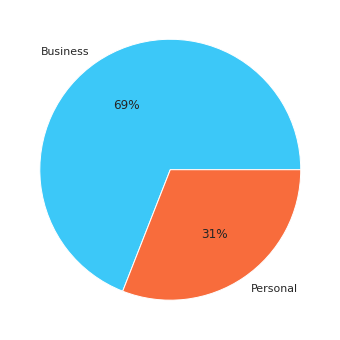

In [183]:

plt.pie(type_of_travel, labels= ['Business', 'Personal'], colors = ['#3CC8F8', '#F86C3C'], autopct='%.0f%%')

plt.show()

In [184]:
flight_class = df['Class'].value_counts()
flight_class

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

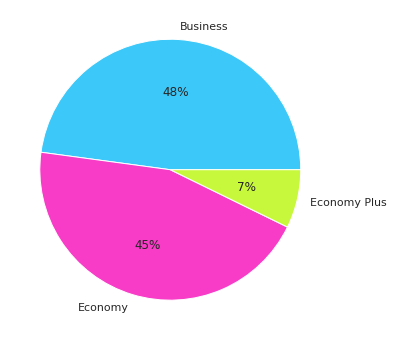

In [185]:
plt.pie(flight_class, labels= ['Business', 'Economy', 'Economy Plus'], colors = ['#3CC8F8', '#F83CC8', '#C8F83C'], autopct='%.0f%%')

plt.show()

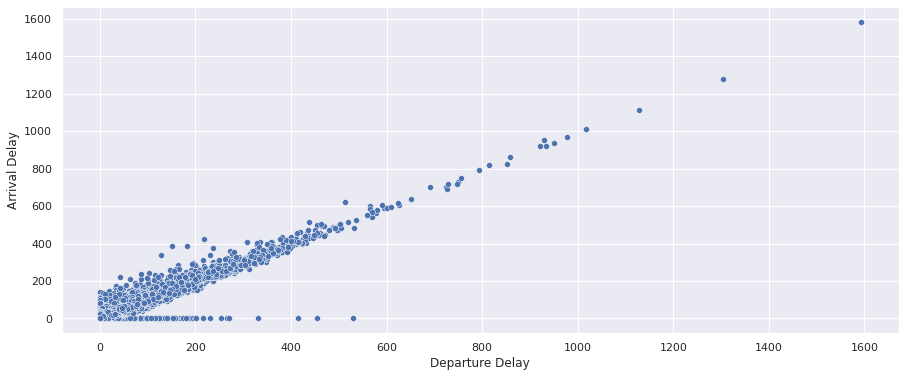

In [186]:

sns.scatterplot(data=df, x='Departure Delay', y='Arrival Delay')

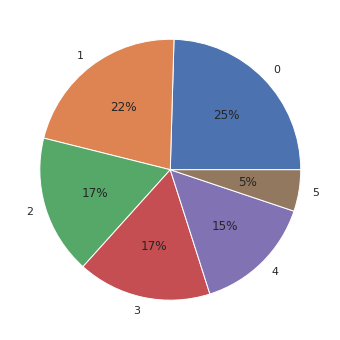

In [187]:
labels = ['0','1', '2', '3', '4', '5'] 
plt.pie(df['Departure and Arrival Time Convenience'].value_counts(), labels=labels, autopct='%.0f%%')
plt.show()

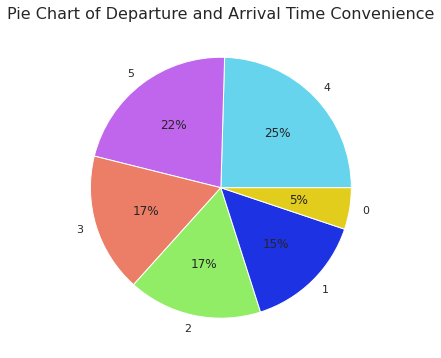

In [188]:
col = 'Departure and Arrival Time Convenience'

x=df[col].value_counts()
labels = []
for i in x.index:
    labels.append(i)
plt.pie(x, labels=labels, autopct='%.0f%%', colors =['#66D4EC', '#C066EC', '#EC7D66', '#91EC66', '#1C32E3', '#E3CD1C'])
plt.title('Pie Chart of '+col, fontsize = 16)
plt.show()

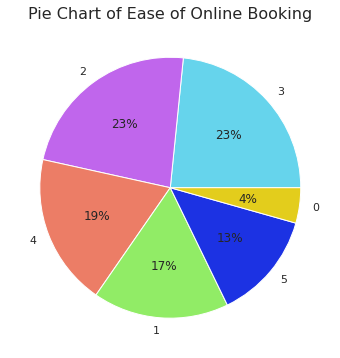

In [189]:
col = 'Ease of Online Booking'

x=df[col].value_counts()
labels = []
for i in x.index:
    labels.append(i)
plt.pie(x, labels=labels, autopct='%.0f%%', colors =['#66D4EC', '#C066EC', '#EC7D66', '#91EC66', '#1C32E3', '#E3CD1C'])
plt.title('Pie Chart of '+col, fontsize = 16)
plt.show()

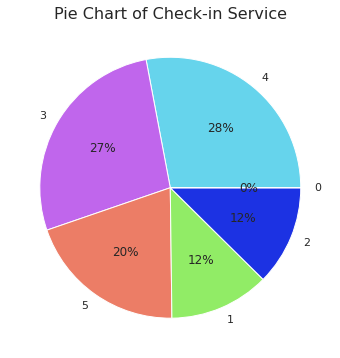

In [190]:
col = 'Check-in Service'

x=df[col].value_counts()
labels = []
for i in x.index:
    labels.append(i)
plt.pie(x, labels=labels, autopct='%.0f%%', colors =['#66D4EC', '#C066EC', '#EC7D66', '#91EC66', '#1C32E3', '#E3CD1C'])
plt.title('Pie Chart of '+col, fontsize = 16)
plt.show()

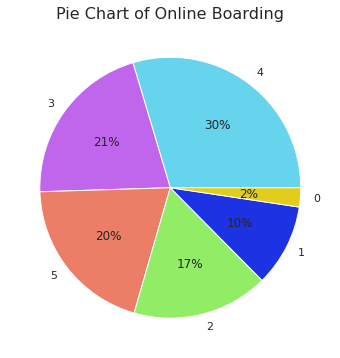

In [191]:
col = 'Online Boarding'

x=df[col].value_counts()
labels = []
for i in x.index:
    labels.append(i)
plt.pie(x, labels=labels, autopct='%.0f%%', colors =['#66D4EC', '#C066EC', '#EC7D66', '#91EC66', '#1C32E3', '#E3CD1C'])
plt.title('Pie Chart of '+col, fontsize = 16)
plt.show()

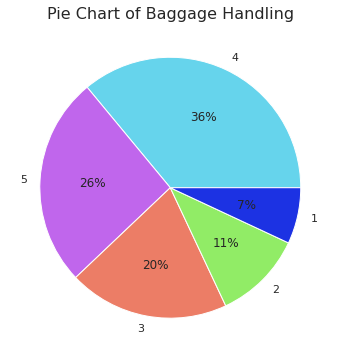

In [192]:
col = 'Baggage Handling'

x=df[col].value_counts()
labels = []
for i in x.index:
    labels.append(i)
plt.pie(x, labels=labels, autopct='%.0f%%', colors =['#66D4EC', '#C066EC', '#EC7D66', '#91EC66', '#1C32E3', '#E3CD1C'])
plt.title('Pie Chart of '+col, fontsize = 16)
plt.show()

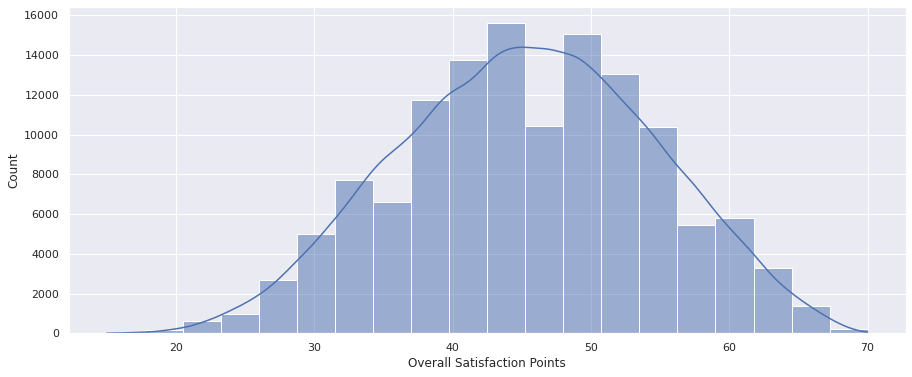

In [193]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.histplot(data=df, x='Overall Satisfaction Points', bins=20, kde = True)

In [194]:
satisfaction = df['Satisfaction'].value_counts()
satisfaction

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

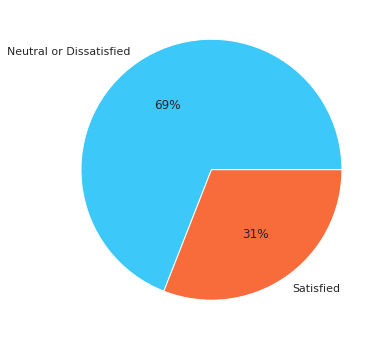

In [195]:
plt.pie(type_of_travel, labels= ['Neutral or Dissatisfied', 'Satisfied'], colors = ['#3CC8F8', '#F86C3C'], autopct='%.0f%%')
plt.show()

In [196]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [197]:
# Encoding Gender column
df['Gender'] = le.fit_transform(df['Gender'])
# Encoding Customer Type column
df['Customer Type'] = le.fit_transform(df['Customer Type'])
# Encoding Type of Travel column
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
# Encoding Class column
df['Class'] = le.fit_transform(df['Class'])
# Encoding Satisfaction column
df['Satisfaction'] = le.fit_transform(df['Satisfaction'])

In [198]:
# Assigning independent values to array X, and dependant values to array y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [199]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [200]:
# Applying feature scaling to independent values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [201]:
# Training the Logistic Regression Model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [202]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [203]:
# Evaluating the model Performance on the training set
lrtrain = classifier.score(X_train , y_train)
lrtrain

0.8738219895287959

In [204]:
# Evaluating the model Performance on the test set
lrtest = classifier.score(X_test , y_test)
lrtest

0.8766245765321835

In [205]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16792  1783]
 [ 2223 11672]]


0.8766245765321835

In [206]:
# Creating a new data frame containing the predicted and actual values
lr_acc = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),
                      columns = ['Predicted', 'Actual'])

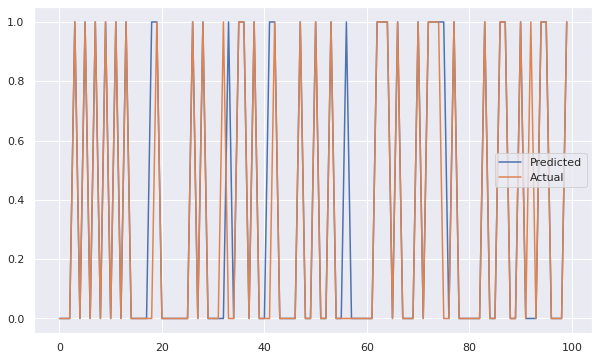

In [207]:
# Plotting a graph showing the comparison between predicted and actual values
plt.figure(figsize = (10,6))
plt.plot(lr_acc[:100])
plt.legend(['Predicted' , 'Actual']);

In [208]:
# Training the K Nearest Neighbors Classifier Model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [209]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [210]:
# Evaluating the model Performance on the training set
knntrain = classifier.score(X_train , y_train)
knntrain

0.949430243301509

In [211]:
# Evaluating the model Performance on the test set
knntest = classifier.score(X_test , y_test)
knntest

0.9306744687403757

In [212]:
# Making the Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[17908   667]
 [ 1584 12311]]


0.9306744687403757

In [213]:
# Creating a new data frame containing the predicted and actual values
knn_acc = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),
                       columns = ['Predicted', 'Actual'])

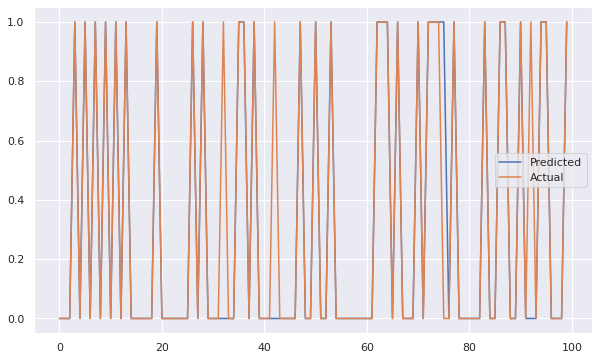

In [214]:
# Plotting a graph showing the comparison between predicted and actual values
plt.figure(figsize = (10,6))
plt.plot(knn_acc[:100])
plt.legend(['Predicted' , 'Actual']);

In [215]:
# Training the Support Vector Machine Classifier Model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [216]:
# Evaluating the model Performance on the training set
svmtrain = classifier.score(X_train , y_train)
svmtrain

0.875772507956062

In [217]:
# Evaluating the model Performance on the test set
svmtest = classifier.score(X_test , y_test)
svmtest

0.8785956267323684

In [218]:
# Making the Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16965  1610]
 [ 2332 11563]]


0.8785956267323684

In [219]:
# Creating a new data frame containing the predicted and actual values
svm_acc = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),
                      columns = ['Predicted', 'Actual'])

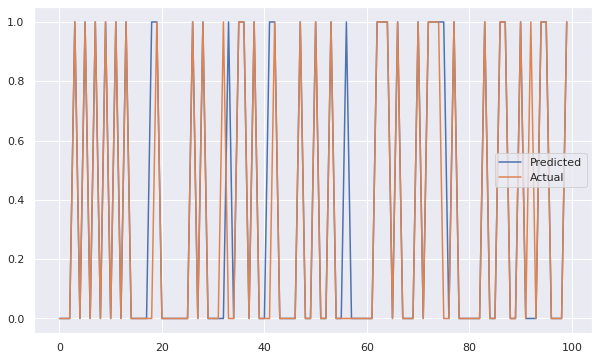

In [220]:
# Plotting a graph showing the comparison between predicted and actual values
plt.figure(figsize = (10,6))
plt.plot(svm_acc[:100])
plt.legend(['Predicted' , 'Actual']);

In [221]:
# Training the Naive Bayes Classifier Model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [222]:
# Evaluating the model Performance on the training set
nbtrain = classifier.score(X_train , y_train)
nbtrain

0.8578072066522944

In [223]:
# Evaluating the model Performance on the test set
nbtest = classifier.score(X_test , y_test)
nbtest

0.858207576224207

In [224]:
# Making the Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16487  2088]
 [ 2516 11379]]


0.858207576224207

In [225]:
# Creating a new data frame containing the predicted and actual values
nb_acc = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),
                      columns = ['Predicted', 'Actual'])

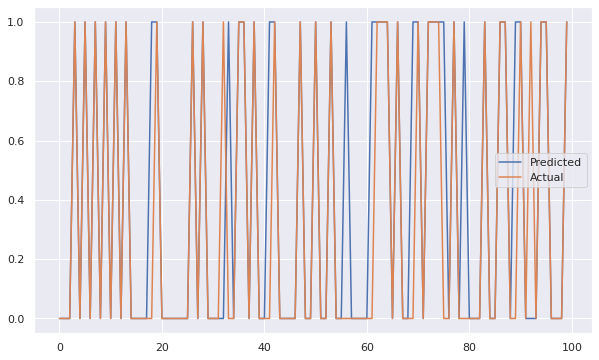

In [226]:
# Plotting a graph showing the comparison between predicted and actual values
plt.figure(figsize = (10,6))
plt.plot(nb_acc[:100])
plt.legend(['Predicted' , 'Actual']);

In [227]:
# Training the Decision Tree Classifier Model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [228]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [229]:
# Evaluating the model Performance on the training set
dttrain = classifier.score(X_train , y_train)
dttrain

1.0

In [230]:
# Evaluating the model Performance on the test set
dttest = classifier.score(X_test , y_test)
dttest

0.9488450877733292

In [231]:
# Making the Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[17706   869]
 [  792 13103]]


0.9488450877733292

In [232]:
# Creating a new data frame containing the predicted and actual values
dt_acc = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),
                       columns = ['Predicted', 'Actual'])

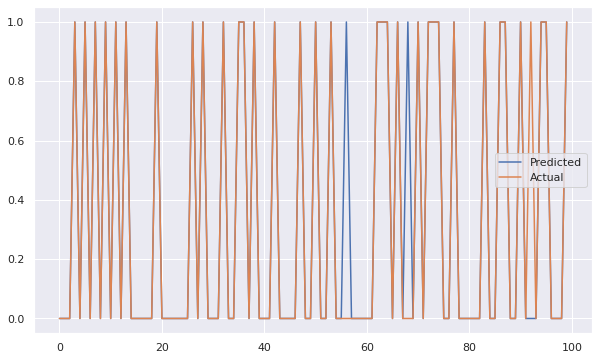

In [233]:
# Plotting a graph showing the comparison between predicted and actual values
plt.figure(figsize = (10,6))
plt.plot(dt_acc[:100])
plt.legend(['Predicted' , 'Actual']);

In [234]:
# Training the Random Forest Cassifier Model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [235]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [236]:
# Evaluating the model Performance on the training set
rftrain = classifier.score(X_train , y_train)
rftrain

0.9972487424289087

In [237]:
# Evaluating the model Performance on the test set
rftest = classifier.score(X_test , y_test)
rftest

0.9583615645210964

In [238]:
# Making the Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18155   420]
 [  932 12963]]


0.9583615645210964

In [239]:
# Creating a new data frame containing the predicted and actual values
rf_acc = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),
                       columns = ['Predicted', 'Actual'])

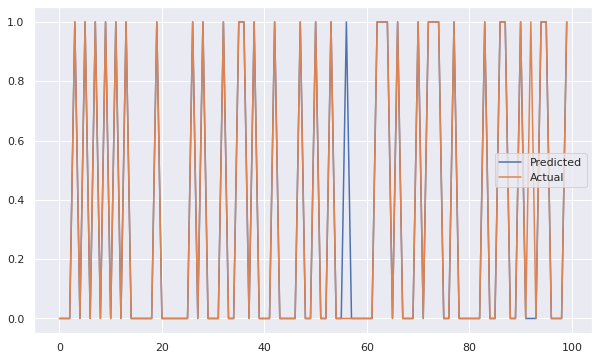

In [240]:
# Plotting a graph showing the comparison between predicted and actual values
plt.figure(figsize = (10,6))
plt.plot(rf_acc[:100])
plt.legend(['Predicted' , 'Actual']);

In [241]:
Models = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Train_Accuracy = [lrtrain, knntrain, svmtrain, nbtrain, dttrain, rftrain]
Test_Accuracy = [lrtest, knntest, svmtest, nbtest, dttest, rftest]
df_models = pd.DataFrame(data = [Train_Accuracy, Test_Accuracy], index = ['Train Score', 'Test Score'], columns = Models)
df_models

,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Naive Bayes,Decision Tree,Random Forest
Train Score,0.873822,0.949430,0.875773,0.857807,1.000000,0.997249
Test Score,0.876625,0.930674,0.878596,0.858208,0.948845,0.958362
